In [4]:
import torch
import torch.nn as nn

from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

C:\Users\minji\AppData\Local\Temp/ipykernel_19500/1666566716.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [2]:
# import dataset (comes with seaborn)
import seaborn as sns
iris = sns.load_dataset('iris')

# check out the first few lines of data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# convert from pandas dataframe to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float() # labels 제외

# transform species to number
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species=='setosa'] = 0 # don't need!
labels[iris.species=='versicolor'] = 1
labels[iris.species=='virginica'] = 2

labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

In [20]:
def train_w_different_h_size(h_size=128):
    
    final_acc = []
    final_loss = []
    for hs in tqdm(range(1, h_size+1)):
        
        model = nn.Sequential(
            nn.Linear(4, hs),
            nn.ReLU(),
            nn.Linear(hs, 3)
        )
        
        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        
        for i in range(150):

            y_pred = model(data)
            loss = loss_func(y_pred, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        predictions = model(data)
        total_loss = loss_func(predictions, labels).item()
        pred_labels = torch.argmax(predictions, axis=1)
        totalacc = 100*torch.mean((pred_labels == labels).float())
        
        final_acc.append(totalacc)
        final_loss.append(total_loss)
        
    return final_acc, final_loss

In [21]:
final_acc, final_loss = train_w_different_h_size()

100%|██████████| 128/128 [00:12<00:00, 10.00it/s]


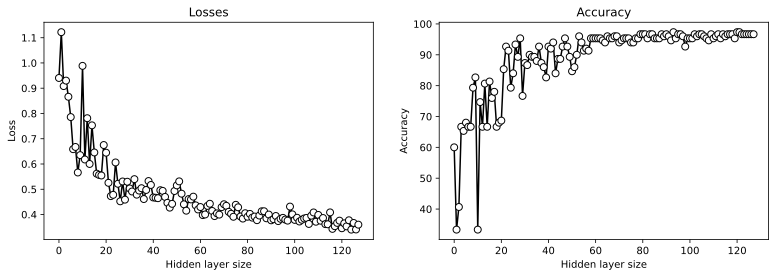

In [23]:
# report accuracy
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(final_loss, 'ko-', markerfacecolor='w', markersize=7)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Hidden layer size')
ax[0].set_title('Losses')

ax[1].plot(final_acc, 'ko-', markerfacecolor='w', markersize=7)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Hidden layer size')
ax[1].set_title('Accuracy')
plt.show()

In [24]:
def train_w_different_h_size(h_size=128):
    
    final_acc = []
    final_loss = []
    for hs in tqdm(range(1, h_size+1)):
        
        model = nn.Sequential(
            nn.Linear(4, hs),
            nn.ReLU(),
            nn.Linear(hs, hs),
            nn.ReLU(),
            nn.Linear(hs, 3)
        )
        
        loss_func = nn.CrossEntropyLoss()
        optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
        
        for i in range(150):

            y_pred = model(data)
            loss = loss_func(y_pred, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
        predictions = model(data)
        total_loss = loss_func(predictions, labels).item()
        pred_labels = torch.argmax(predictions, axis=1)
        totalacc = 100*torch.mean((pred_labels == labels).float())
        
        final_acc.append(totalacc)
        final_loss.append(total_loss)
        
    return final_acc, final_loss

In [25]:
final_acc, final_loss = train_w_different_h_size()

100%|██████████| 128/128 [00:30<00:00,  4.23it/s]


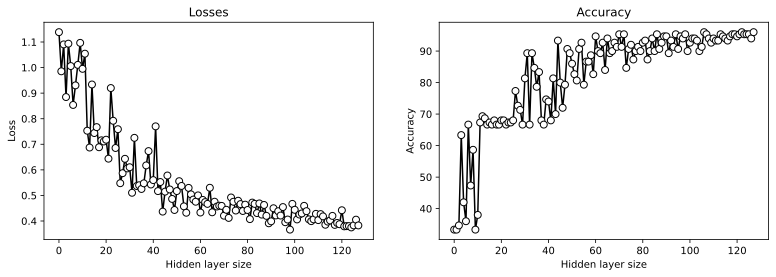

In [26]:
# report accuracy
fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(final_loss, 'ko-', markerfacecolor='w', markersize=7)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Hidden layer size')
ax[0].set_title('Losses')

ax[1].plot(final_acc, 'ko-', markerfacecolor='w', markersize=7)
ax[1].set_ylabel('Accuracy')
ax[1].set_xlabel('Hidden layer size')
ax[1].set_title('Accuracy')
plt.show()